# OPERACIONES BASICAS

Trataremos aqui las operaciones mas basicas que se pueden realizar sobre las estructuras de datos de pandas. Estas operaciones tienen un funcionamiento practicamente identico en Series y DataFrame. En caso de que esto no sea asi en algun caso concreto se indicara explicitamente.

In [ ]:
import numpy as np
import pandas as pd  

### TRATAMIENTO DE SERIES Y DATAFRAME COMO DICCIONARIOS

Dado que internamente las Series como los DataFrames pueden verse como diccionarios, podemos aplicar sobre los mismos cualquier funcionalidad que aplicariamos sobre diccionarios basicos del core de Python

IMPORTANTE_: Hay que tener en cuenta que en DataFrame el diccionario es un diccionario de "columna"

In [ ]:
serie = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
serie 

In [ ]:
dataframe = pd.DataFrame({"var1": serie, "var2": serie})
dataframe

INDEXACION POR CLAVE

In [ ]:
# INDEXACION MEDIANTE CLAVE DEL INDICE EN SERIE
serie["a"]

In [ ]:
# INDEXACION POR NOMBRE DE COLUMNA EN DATAFRAME
dataframe["var2"]

COMPROBACION DE LA EXISTENCIA DE UNA CLAVE

In [ ]:
#COMPROBACION DE LA EXISTENCIA DE UNA CLAVE EN EL INDICE EN SERIES
"b" in serie

In [ ]:
#COMPROBACION DE LA EXISTENCIA DE UN NOMBRE DE COLUMNA EN DATAFRAME
"b" in dataframe

In [ ]:
#COMPROBACION DE LA EXISTENCIA DE UN NOMBRE DE COLUMNA EN DATAFRAME
"var1" in dataframe

ADICION DE ELEMENTOS

IMPORTANTE: Al añadir columnas a un DataFrame, el tamaño del vector añadido coincidir con el del DataFrame original. En caso contrario se recibira un error

In [ ]:
#ADICION DE ELEMENTOS A SERIES


In [ ]:
#ADICION DE ELEMENTOS A DATAFRAME

ELIMINACION DE ELEMENTOS

In [ ]:
#ELIMINACION DE ELEMENTOS EN SERIES
del serie["e"]
serie

In [ ]:
#ELIMINACION DE COLUMNAS EN DATAFRAMES
del dataframe["var3"]
dataframe

### TRATAMIENTO DE SERIES Y DATAFRAMES COMO ARRAYS

Dado qie, internamente, cualquier estructura de pandas esta implementada sobre ndarrays de Numpy, es posible realizar sobre Series y Datas Frames las operaciones que se pueden realizar sobre un ndarrays

IMPORTANTE: Dado que un ndarray no puede mezclar elementos de diferentes tipos y un DataFrames si, algunas de las operaciones sobre DataFrames  estaran supeditadas a que todas sus columnas tengan el mismo tipo

In [ ]:
serie = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
serie

In [ ]:
dataframe = pd.DataFrame({"var1": pd.Series(serie, dtype=np.int32), "var2": pd.Series(serie, dtype=np.string_)})
dataframe

### CONSULTA DE LA COMPOSICION

Disponemos de los mismos atributos de consulta que en ndarrays, si bien hay que tener en cuenta que:
* El atributo dtype sera dtypes en DataFrame dada la posibilidad de multiples tipos
* El atributo ndim en Series siempre valdra 1 dado que siempre son estructuras unidimesnionales y 2 en DataFrames dado que siempre son estructuras bidimensionales

In [ ]:
#CONSULTA DEL TIPO ALMACENADO EN UNA SERIE
serie.dtype

In [ ]:
#CONSULTA DEL TIPO ALMACENADO EN UN DATAFRAME
dataframe.dtypes

In [ ]:
#CONSULTA DEL NUMERO DE DIMENSIONES EN UNA SERIE
serie.ndim

In [ ]:
#CONSULTA DEL NUMERO DE DIMENSIONES EN UN DATAFRAME
dataframe.ndim

In [ ]:
#CONSULTA DE LA FORMA DE UNA SERIE
serie.shape

In [ ]:
#CONSULTA DE LA FORMA DE UN DATAFRAME
dataframe.shape

In [ ]:
serie.size

In [ ]:
dataframe.size

OPERACIONES CON ESCALERAS

Al aplicar una operacion sobre una estructura de pandas y un escalar se obtendra otra estruectura de pandas de identicas caracteristicas a la inicial pero con la operacion aplicada elemento a elemento, menteniendo el indice inalterado.

IMPORTANTE: Dado que un DataFrame puede mezclar tipos muy diferentes en sus columnas, la apliacion de una operacion con un escalar elemento a elemento pude no ser valida (p.e operaciones matematicas sobre cadenas)

In [ ]:
#SUMA DE SERIES Y ESCALAR
serie + 2

In [ ]:
#DIVISON DE SERIES Y ESCALAR
1 / serie

In [ ]:
#MULTIPLIACION DE DATAFRAME Y ESCALAR
dataframe * 2

In [ ]:
# DIVISION DE DATAFRAME Y ESCALAR
1 / dataframe

### OPERACIONES ENTRE ESTRUCTURAS DE PANDAS

Al aplicar una operacion entre estrucutras de pandas se aplicara la misma elemento a elemento. En el caso de pandas no es necesario, Numpy, que los operandos tnegan el mismo tamaño y forma ya que se aplicara un proceso de "alineacion". Este proceso devolver:
* Como indice: la union de la claves de ambos operadores
* Como valores: el resultado de aplicar la operacion entre cada pareja de elementos (si coinciden las claves entre ambos operandos) o NaN (en caso contrario)

IMPORTANTE: De nuevo, el hecho de que un DataFrame puede mezclar tipos en sus contenidos hace que no todas las operaciones matematiocas se pueden aplicar a los mismos.


In [ ]:
serie

a    1
b    2
c    3
d    4
dtype: int64

In [ ]:
dataframe

,var1,var2
a,1,b'1'
b,2,b'2'
c,3,b'3'
d,4,b'4'


In [ ]:
serie1 = serie[:]
serie1

a    1
b    2
c    3
d    4
dtype: int64

In [ ]:
serie1["e"] = 7
serie1

a    1
b    2
c    3
d    4
e    7
dtype: int64

In [ ]:
dataframe1 = dataframe
dataframe1["var3"] = [1, 2, 3, 4]
dataframe1

In [ ]:
#SUMA DE SERIES
serie + serie1

In [ ]:
#SUMA DE DATAFRAME
dataframe + dataframe1

In [ ]:
#PRODUCTO DE DATAFRAME
dataframe * dataframe1

### TRASPOSICION - SOLO DATA FRAME

Podemos trasnponer filas por columnas, pero unicamente en DataFrame (ya que las series solo pueden ser unidimensionales). Basicamente lo que se realizara es intercambair el indice de columans por el de filas

In [ ]:
dataframe

In [ ]:
dataframe.T

### FUNCIONES DE NUMPY (UNIVERSAL FUNCTION, OPERACIONES MAT)

Podemos aplicar cualquier funcion de Numpy a cualquier estructura de pandas
IMPORTANTE: De nuevo, al poder tener multiples tipos de DataFrame no siempre se pondra aplicar las operaciones (o el resultado obtenido no sera el esperado). Ademas, en el caso de DataFrame en caso de no indicar un valor para axis se aplicara la operacion por columnas y nunca sobre el DataFrame completo

In [ ]:
#OPERACIONES OSBRE SERIES
np.sqrt(serie)

In [ ]:
dataframe

In [ ]:
#OPERACIOENS SOBRE DATAFRAME (COLUMNA A COLUMNA, POR DEFECTO)
np.sum(dataframe)

In [ ]:
##OPERACIOENS SOBRE DATAFRAME (ESPECIFICANDO EL EJE)
np.sum(dataframe, axis=1)

# OPERACIONES BASICAS II

Ademas de poder reutilizar los metodos de indexacion y slicing de Numpy sobre Series Y DataFrame (con las limitaciones ya comentadas) pandas pone a nuestra disposicion nuevos metodos de indexacion que permiten un mayor control sobre la misma y superar las limitaciones que nos impone Numpy sobre este tipo de estructuras. Veamos todas las posibles combinaciones



INDEXACION POR ATRIBUTOS CLAVES

Podemos indexar un elemento concreto de una Serie o una columna concreta de un DataFrame mediante el uso de su etiqueta/clave como atributo con sintaxis obj.etiqueta

In [ ]:
serie = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
serie.a

In [ ]:
dataframe = pd.DataFrame(np.arange(16).reshape(4, 4), index=["f1", "f2", "f3", "f4"], columns=["c1", "c2", "c3", "c4"])
dataframe.c1

f1     0
f2     4
f3     8
f4    12
Name: c1, dtype: int64

INDEXACION CON SINTAXIS [] DIRECTA

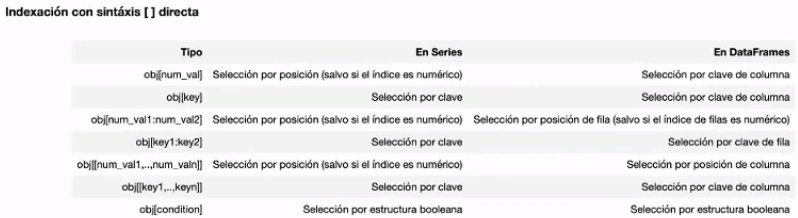

In [ ]:
serie

In [ ]:
serie[0]

In [ ]:
dataframe

In [ ]:
dataframe[0]

INDEXACION CON MEDOTO .LOC POR CLAVES

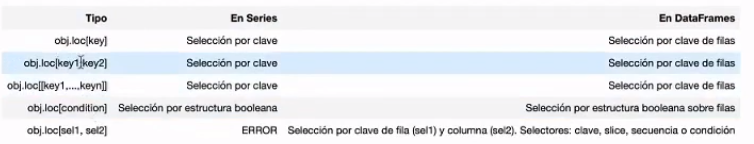

In [ ]:
serie.loc["b"]

In [ ]:
dataframe.loc["f1"]

INDEXACION CON MEDOTO .LOC POR INDICES

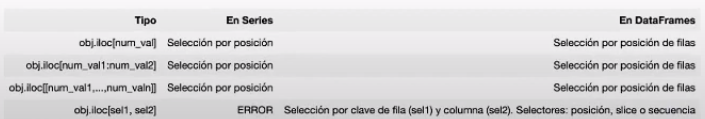

In [ ]:
serie.iloc[0]

In [ ]:
dataframe.iloc[3]

### INDICES JERARQUICOS EN PANDAS

Los indices jerarquicos de "pandas" permiten tener mas de un nivel en cualquiera de los indices de un estructura. Esto puede servir para agrupar mas claramante los datos, o para conseguir identificar las filas por una clave unica. En cierto modo, tambien es una forma de poder trabajar con tablas de mas de dos dimensiones


In [ ]:
peliculas = pd.DataFrame({"Valoracion":[6, None, 8.75, None], "Presupuesto":[16, 250, 100, None], "Director":["Peter Jackspon", "Gareth Edwards", "Martin Scorsese", "Alfonso Cuaron"]}, index=[[2014, 2014, 2013, 2013], ["Godzila", "El Hobbit III", "El Lobo de Wall Steeet", "Gravity"]])
peliculas

Valoracion  Presupuesto         Director
2014 Godzila                       6.00         16.0   Peter Jackspon
     El Hobbit III                  NaN        250.0   Gareth Edwards
2013 El Lobo de Wall Steeet        8.75        100.0  Martin Scorsese
     Gravity                        NaN          NaN   Alfonso Cuaron

A partir de la construccion del indice jerarquico, podemos hacer indexaciones totales (mediante tuplas) o parciales (mediante seleccion de uno de los elementos del indice)

In [ ]:
#INDEXACION TOTAL
peliculas.loc[(2014, "Godzilla")]

In [ ]:
#INDEAXACION PARCIAL
peliculas.loc[2014]

Podemos pasar niveles del indice jerarquico de las filas a las columnas mediante la funcion unstack, como si de una Pivot Table de Excel se tratase, con la funcion stack realizamos la operacion contraria

In [ ]:
#PASAMOS AL ULTIMO NIVEL DEL INDICE DE FILAS AL DE COLUMNAS
peliculas_2 = peliculas.unstack()
peliculas_2

In [ ]:
#PASAMOS AL ULTIMO NIVEL DEL INDICE DE COLUMNAS AL DE FILAS
peliculas.stack()

In [ ]:
peliculas_2.stack()

### REINDEXACION, ESTABLECIMIENTO Y DESCARTE DE INDICES

Puedes existir ocaciones en las que se desee modiifcar el indice de una estructura tras haberla creado. En este caso no se trata de cambiar las etiquetas asignadas sini reordenamientos, elimicaion o adicion de etiquetas. Para ello, pandas nos ofrece el metodo reindex. Lo que obtendremos sera una nueva estructura (copia) con el indice seleccionado

En el caso de un nuevo indice, los elementos nuevos se rellenaran a NaN. Para evitarlo, disponemos de los siguientes parametros
* fill_value: Relleno a un valor fijo establecido
* method: Relleno segun un metodo definido
  
  *ffill: relleno mediante la observacionde los ultimos valores rellenos
  
  *bfill: relleno mediante la observacion de los proximos valores rellenos

In [ ]:
serie = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
serie

In [ ]:
dataframe = pd.DataFrame(np.arange(16).reshape(4, 4), index=["f1", "f2", "f3", "f4"], columns=["c1", "c2", "c3", "c4"])
dataframe

In [ ]:
#REORDENACION DEINDICE DE UNA SERIE
serie.reindex(["d", "a", "b, "c"]) #todo en orden inverso

In [ ]:
#ADICION DE ETIQUETAS A UN INDICE DE UNA SERIE
serie.reindex(["a", "b", "e", "d", "c"])

In [ ]:
#ADICION DE ETIQUETAS CON VALOR DE RELLENO A UN INDICE DE UNA SERIE
serie.reindex(["a", "b", "e", "d", "c"], fill_value=0)

In [ ]:
#SELECCION DE INDICE DE FILAS DE UN DATAFRAME
dataframe.reindex(["f1", "f3"])

In [ ]:
#ADICION DE ETIQUETAS AL INDICE DE FILAS DE UN DATAFRAME
dataframe.reindex(["f1", "f3", "f6"])

In [ ]:
#ADICION DE ETIQUETAS AL INDICE DE FILAS DE UN DATAFRAME CON METODO DE RELLENO
dataframe.reindex(["f1", "f3", "f10"], method="bfill")

In [ ]:
#ADICION DE ETIQUETAS AL INDICE DE FILAS DE UN DATAFRAME CON METODO DE RELLENO
dataframe.reindex(["f1", "f3", "f10"], method="bfill")

In [ ]:
#MODIFICACION DEL INDICE DE COLUMNA DE UN DATAFRAME
dataframe.reindex(columns=["c1", "c3", "c2"])

En cualquier momento, podemos descartar el indice de un DataFrame incorporando el mismo como una columna mas de nuestros datos mediante la funcion reset_index. Esto hara que el indice pase a ser una secuencia numerica

In [ ]:
dataframe.reset_index()

Del mismo podemos reestablecer un conjunto de columnas como indices de un DataFrame con la funcion de set_index

In [ ]:
dataframe.set_index(["c1"])

# OPERACIONES BASICAS III

In [ ]:
import numpy as np
import pandas as 

TABLAS PIVOTE

Siguiendo con las funciones de gestion de indices, pasndas incluye la posibilidad de gestionar los mismos como si de una Pivot Table de Excel se tratase haciendo mucho mas sencillo el analisis de informacion resultante

In [ ]:
peliculas = pd.DataFrame({"Año":[2014, 2014, 2013, 2013, 2001], "Valoracion":[6, None, 8.75, None, 8.9], "Presupuesto":[160, 250, 100, None, 93], "Director":["Gareth Edwards", "Peter Jackspon", "Martin Scorsese", "Alfonso Cuaron", "Peter Jackspon"], "Titulo":["Godzilla", "El Hobbit III", "El Lobo de Wall Steeet", "Gravity", "Lord of the Rings"]})
peliculas

In [ ]:
#FILAS: AÑO, COLUMNAS: DIRECTOR, VALORES, TITULO
peliculas.pivot("Año", "Director", "Titulo")

Si bien esto mismo ya lo podiamos realizar con las operaciones vistas hasta ahora

In [ ]:
#ESTABLECEMOS EL INDICE A LAS DOS VARIABLES SOBRE LAS QUE QUEREMOS "PIVOTAR"
p = peliculas.set_index(["Año", "Director"])
p

In [ ]:
#PASAMOS EL ULTIMO NIVEL DE INDICE DE FILAS A COLUMNAS
p = p.unstack()
p

In [ ]:
#ELEGIMOS UNICAMENTE EL VALOR DE LA COLUMNA TITULO
p["Titulo"]

Tambien podemos crear tablas pivotes utilizando una funcion de agregacion para los valores, de forma que se haga una agrpacion de resultados

In [ ]:
#HACEMOS QUE HAYA DOS PELICULAS PARA EL MISMO AÑO Y DIRECTOR
peliculas.loc[pelicula["Año"] == 2001, "Año"] = 2014

In [ ]:
#UTILIZAMOS LA FUNCION PIVOT_TABLE PARA ESTABLECER: VALOR, INDICE, COLUMNAS Y FUNCION DE AGREGACION EN CASO
pd.pivot_table(peliculas, values="Presupuestos", index=["Director"], columns=["Año"], aggfunc=np.sum)

### ELIMINACION DE FILAS Y/O COLUMNAS EN PANDAS

Aunque el proceso de eliminacion de columnas se puede hacer mediante la apliacion de los mismos metodos que en el caso de diccionarios, pandas pone a nuestra disposicion el metodo drop

In [ ]:
serie = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
serie

In [ ]:
dataframe = pd.DataFrame(np.arange(16).reshape(4, 4), index=["f1", "f2", "f3", "f4"], columns=["c1", "c2", "c3", "c4"])
dataframe

In [ ]:
#ELIMINACION DE VALORES DE UNA SERIE
serie.drop("a")

In [ ]:
del serie["b"]

In [ ]:
#ELIMINACION DE FILAS DE UN DATAFRAME
dataframe.drop("f1")

In [ ]:
dataframe

In [ ]:
dataframe.drop("c2", axis=1)

### ARITMETICA CON ESTRUCTURA DE PANDAS

Aunque, como ya de ha visto, podemos aprovechar la compatibilidad con Numpy para llevar a cabo operaciones aritmeticas basicas, estas operaciones aplican el proceso de "alienacion" de indices introduciendo valores NaN en los resultados cuando no hay coincidencia de claves. Para solucionar este problema, pandas nos ofrece algunas funciones de utilidad para las mas basicas(suma, resta, multiplicacion y division) que permiten establecer un valor "relleno" en el caso de claves no coincidentes


In [ ]:
serie1 = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
serie1

In [ ]:
serie2 = pd.Series([5, 6, 7, 8], index=["c", "d", "e", "f"])
serie2

In [ ]:
#RESULTADO DE OPERACION BASICA
serie1 + serie2

In [ ]:
#RESULTADO CON OPERACION PANDAS
serie1.add(serie2)

In [ ]:
#RESULTADO CON OPERACION PANDAS Y RELLENO
serie1.add(serie2, fill_value=0)

In [ ]:
serie1.sub(serie2, fill_value=0)

In [ ]:
serie1.mul(serie2, fill_value=0)

In [ ]:
serie1.div(serie2, fill_value=0)

### ORDENACION EN ESTRUCTURAS DE PANDAS

Pandas pone a nuestra disposicion varias formas de realizar ordenaciones de los contenidos de una Serie o un DataFrame. Vamos a ver los mas utilizados

ORDENACION EN SERIES

In [ ]:
serie = pd.Series([3, 2, 1, 4], index=["d", "a", "c", "b"])
serie

In [ ]:
#ORDENACION POR INDICE
serie.sort_index()

In [ ]:
#ORDENACION DESCEDENTE POR INDICE
serie.sort_index(ascending=False)

In [ ]:
#ORDENACION POR VALORES
serie.sort_values()

In [ ]:
#ORDENACION POR VALORES DESCENDENTE
serie.sort_values(ascending=False)

ORDENACION EN DATAFRAME

In [ ]:
dataframe = pd.DataFrame(np.arange(16).reshape(4, 4), index=["f3", "f1", "f4", "f2"], columns=["c3", "c1", "c4", "c2"])
dataframe

In [ ]:
dataframe.sort_index()

In [ ]:
dataframe.sort_index(axis=1)

In [ ]:
dataframe.sort_index(ascending=False)

In [ ]:
dataframe.sort_values(["f1"], axis=1)

In [ ]:
dataframe.sort_values(["c1"])

### RECUPERACION DE MUESTRAS PARCIALES DEL CONTENIDO

En estructuras de datos potencialmente grandes, suele ser muy necesariamente la recuperacion de una miestra de ejemplo de un conjunto reducido de elementos que permitan hacerse una idea del contenido de la estructura sin necesidad de listar TODO el contenido de la misma. Pandas como R, pone a nuestra disposicion dos metodos head(para obtener una muestra del inicio de la estructura) y tail para obtener la muestra del final. Ambos metodos recibiran como parametros el numero de registros a recuperar

*   Elemento de la lista
*   Elemento de la lista



In [ ]:
serie = pd.Series(np.arange(100))
serie

In [ ]:
dataframe = pd.DataFrame(np.arange(100).reshape(10, 10))
dataframe

In [ ]:
#RECUPERACION DE LOS 5 PRIMEROS ELEMENTOS DE UNA SERIE
serie.head()

In [ ]:
#RECUPERACION DE LOS 5 ULTIMOS ELEMENTOS DE UNA SERIE
serie.tail()

In [ ]:
#RECUPERACION DE LOS 3 PRIMEROS ELEMENTOS DE UN DATAFRAME
dataframe.head()

In [ ]:
#RECUPERACION DE LOS 3 ULTIMOS ELEMENTOS DE UN DATAFRAME
dataframe.tail(3)